In [1]:
from google.colab import drive

drive.mount("/content/my_drive/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/my_drive/


In [0]:
import os
os.chdir('/content/my_drive/My Drive/google_colab_experiment')

In [3]:
print(os.getcwd())

/content/my_drive/My Drive/google_colab_experiment


In [0]:
#import argparse
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mylib.data_preprocessing as dpp
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from keras.utils import np_utils
from keras.models import load_model

from keras.models import Sequential
from keras.layers import Dense
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam, SGD
from keras.layers import LeakyReLU
import seaborn as sb

In [5]:
input_path = "/content/my_drive/My Drive/google_colab_experiment/data/skeleton_raw.csv"
print(input_path)

/content/my_drive/My Drive/google_colab_experiment/data/skeleton_raw.csv


In [0]:
try:
  raw_data = pd.read_csv(input_path, header=0)
except:
  print("read data error.")

In [7]:
# X: input, Y: output
dataset = raw_data.values
X = dataset[:, 0:36].astype(float)
Y = dataset[:, 36]
print(X.shape)
print(Y.shape)

(3916, 36)
(3916,)


In [0]:
class_name = ['kick', 'punch', 'squat', 'stand', 'wave']

In [0]:
X_pp = []
for i in range(len(X)):
  X_pp.append(dpp.pose_normalization(X[i]))
X_pp = np.array(X_pp)

In [10]:
encoder = LabelEncoder()
encoder_Y = encoder.fit_transform(Y)
one_hot_Y = np_utils.to_categorical(encoder_Y)
print(Y[0], ": ", encoder_Y[0])
print(Y[650], ": ", encoder_Y[650])
print(Y[1300], ": ", encoder_Y[1300])
print(Y[1950], ": ", encoder_Y[1950])
print(Y[2600], ": ", encoder_Y[2600])

print(encoder_Y[0], ": ", one_hot_Y[0])

kick :  0
kick :  0
punch :  1
squat :  2
stand :  3
0 :  [1. 0. 0. 0. 0.]


In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X_pp, one_hot_Y, test_size=0.1, random_state=42)

In [12]:
X_val, Y_val = X_train[3200:, :], Y_train[3200:, :]
X_train, Y_train = X_train[:3200, :], Y_train[:3200, :]
print(X_train.shape, Y_train.shape)

(3200, 26) (3200, 5)


In [0]:
model = Sequential()
model.add(Dense(units=128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=16, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=5, activation='softmax'))

In [0]:
#callbacks
filepath = 'action_recognition.hdf5'

checkpoint = ModelCheckpoint(filepath,
                             monitor = 'val_acc',
                             verbose = 1,
                             save_best_only = True,
                             mode = 'max')

callbacks_list = [checkpoint]

In [0]:
model.compile(optimizer=Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
His = model.fit(X_train, Y_train, batch_size=32, epochs=50, verbose=1, validation_data=(X_test, Y_test), callbacks=callbacks_list)

Train on 3200 samples, validate on 392 samples
Epoch 1/50
3200/3200 [==============================] - 1s 244us/step - loss: 0.0019 - accuracy: 0.9994 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 2/50
2496/3200 [======================>.......] - ETA: 0s - loss: 0.0033 - accuracy: 0.9988

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


3200/3200 [==============================] - 0s 70us/step - loss: 0.0029 - accuracy: 0.9991 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 3/50
3200/3200 [==============================] - 0s 64us/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 4/50
3200/3200 [==============================] - 0s 67us/step - loss: 0.0017 - accuracy: 0.9997 - val_loss: 0.0080 - val_accuracy: 0.9949
Epoch 5/50
3200/3200 [==============================] - 0s 68us/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 9.3728e-04 - val_accuracy: 1.0000
Epoch 6/50
3200/3200 [==============================] - 0s 64us/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.0035 - val_accuracy: 0.9974
Epoch 7/50
3200/3200 [==============================] - 0s 66us/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0063 - val_accuracy: 0.9974
Epoch 8/50
3200/3200 [==============================] - 0s 65us/step - loss: 0.0043 - accuracy: 0.9987 - val_loss: 0.0088 - val_accuracy:

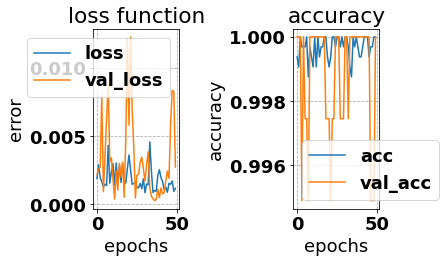

In [60]:
fig, ax = plt.subplots(1,2)
ax[0].set_title("loss function")
ax[0].plot(np.arange(0, 50), His.history['loss'])
ax[0].plot(np.arange(0, 50), His.history["val_loss"])
ax[0].set_xlabel("epochs")
ax[0].set_ylabel("error")
ax[0].grid(linestyle = '--')
ax[0].legend(['loss', 'val_loss'])
ax[1].set_title("accuracy")
ax[1].plot(np.arange(0, 50), His.history['accuracy'])
ax[1].plot(np.arange(0, 50), His.history['val_accuracy'])
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('accuracy')
ax[1].grid(linestyle = '--')
ax[1].legend(['acc', 'val_acc'])
plt.tight_layout()
saving_image = plt.savefig('plot.png')

In [0]:
model.save('action_recognition.hdf5')

In [0]:
save_model = load_model('action_recognition.hdf5')

In [32]:
score = save_model.evaluate(X_val, Y_val, verbose = 1)
print(score[0],'\n',score[1])

324/324 [==============================] - 0s 214us/step
0.0020444058542956173 
 1.0


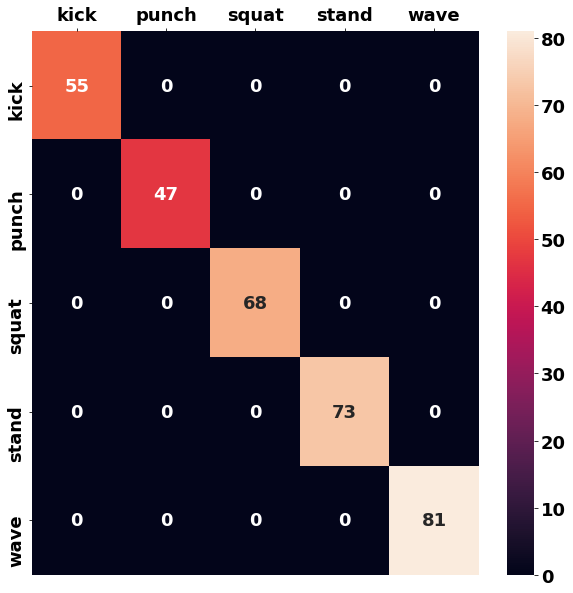

In [61]:
font = {
    'family' : 'Bitstream Vera Sans',
    'weight' : 'bold',
    'size'   : 18
}
plt.rc('font', **font)

pred = save_model.predict(X_val, batch_size = 32)
confusionMatrix = confusion_matrix(np.argmax(Y_val, axis = 1),np.argmax(pred, axis = 1))
df_cm = pd.DataFrame(confusionMatrix, index = [i for i in class_name],
                  columns = [i for i in class_name])

fig, ax = plt.subplots()
ax.xaxis.tick_top()
fig.set_size_inches((10,10))
sb.heatmap(df_cm,annot=True,ax=ax)
plt.savefig('confusion_matrix.png')